In [ ]:
import torch
from torch import nn
import torch.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [ ]:
#from pdf2image import convert_from_path
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

In [ ]:
!git clone https://github.com/astronikil/NeuralWordCounter.git
!pip install -q datasets
from datasets import load_dataset
test_pdfdataset = load_dataset('astronikil/AutoPdfLen')

Cloning into 'NeuralWordCounter'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 0), reused 16 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 674.83 KiB | 21.77 MiB/s, done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

Test%2Ftest.csv:   0%|          | 0.00/61.3k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
#Import neural net from git repo
from NeuralWordCounter.src.pdfcnn import pdfcnn

In [ ]:
#
# Define model and initialize weights
#
model = pdfcnn()
#Use parameter values from pretraining in git repo
model.load_state_dict(torch.load('NeuralWordCounter/model/model_classifier_2dcnn.pt', weights_only=True))

<All keys matched successfully>

------------- Length Assessments --------------

Actual:   1648.995638212563 

Predict:  1700 

------- Sampled page with random text and figures ---------



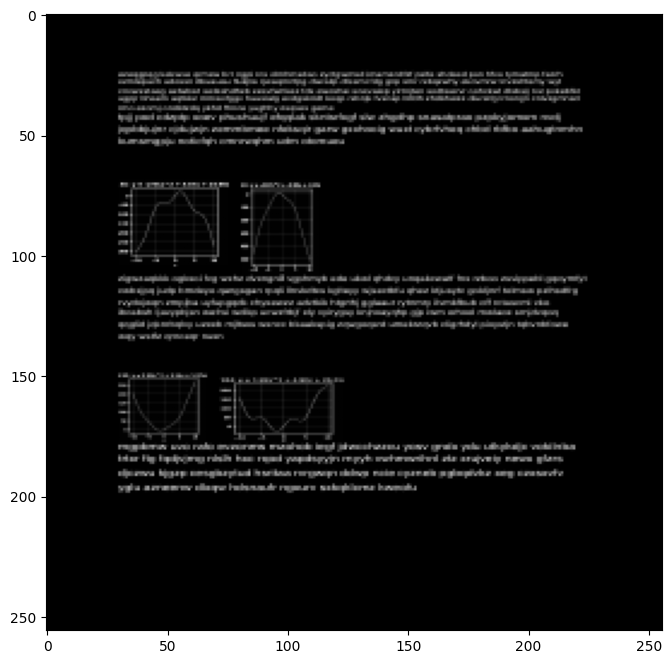

In [ ]:
# Pick and fetch a random page from validation data set
j_page = np.random.randint(2000)
tstdata = test_pdfdataset['test'][j_page]
filename = tstdata['fname'] #Get to the expected minibatch format
nwords = tstdata['nword']
img = torch.tensor([np.loadtxt('https://huggingface.co/datasets/astronikil/AutoPdfLen/raw/main/Test/'+filename, delimiter=',')]).float()
img = img.unsqueeze(0)

model.eval()
with torch.no_grad():
    pred = model(img)

#Print actual word equivalent count, model expectation, and picture of the page
print( '------------- Length Assessments --------------\n')
print( 'Actual:  ', nwords, '\n' )
print( 'Predict: ', pred.argmax(1).tolist()[0]*100, '\n' )

print( '------- Sampled page with random text and figures ---------\n')
fig, ax = pl.subplots(1, 1, figsize=(8, 8))
b = (1.0 - img/255.0)/1.0
ax.imshow(b[0][0], cmap='gray', vmin=0, vmax=1)